In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import csv
import os

In [2]:
class KaggleLoadSubmit:
    def __init__(self, competition_name, csv_dir):
        """Kaggleのデータのダウンロードおよび提出を行うクラス

        Args:
            competition_name (string): Kaggleのコンペ名
            csv_dir (string): ダウンロード先と、提出先のcsvのディレクトリをstringで指定
        """
        self.kaggle_api = KaggleApi()
        self.csv_dir = csv_dir
        self.competition_name = competition_name
        if self.csv_dir[-1] != '\\':
            self.csv_dir += '\\'
        self.kaggle_api.authenticate()

    def download_zip(self):
        """コンペティションのzipファイルをダウンロードする
        """
        ret = self.kaggle_api.competition_download_files(self.competition_name, self.csv_dir, force=True)
        print(ret)

    def submit_csv(self, csv_name, message):
        """csvデータを提出する

        Args:
            csv_name (string): csvの名前
            message (string): 提出メッセージ
        """
        csv_path = self.csv_dir + csv_name
        self.kaggle_api.competition_submit(csv_path, message, self.competition_name)

In [3]:
work_dir = 'C:\\Users\\Takanori\\Desktop\\Kaggle\\titanic'
kls = KaggleLoadSubmit('titanic', work_dir)

# Titanic
https://www.kaggle.com/c/titanic/

In [4]:
import pandas as pd
import pandas_profiling

In [5]:
# データの読み込み
data_dir = 'C:\\Users\\Takanori\\Desktop\\Kaggle\\titanic\\data'
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [6]:
# pandas_profilingで概要をつかむ
pandas_profiling.ProfileReport(train)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


PassengerId


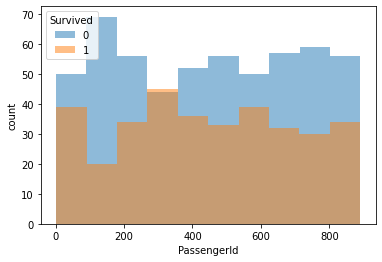

Survived


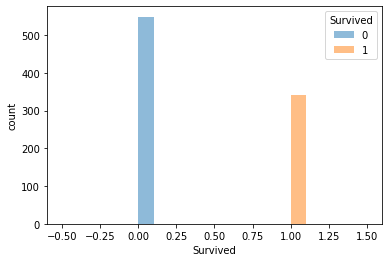

Pclass


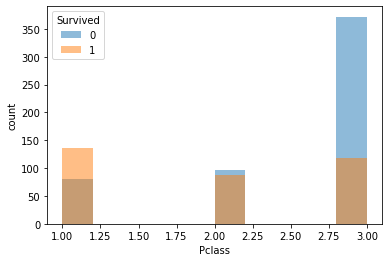

Name


In [7]:
# 目的変数との関係を確認する
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

def show_hist(data, target):
    print(target)
    plt.hist(data.loc[data['Survived']  == 0, target].dropna(), label='0', alpha=0.5)
    plt.hist(data.loc[data['Survived']  == 1, target].dropna(), label='1', alpha=0.5)
    plt.xlabel(target)
    plt.ylabel('count')
    plt.legend(title='Survived')
    plt.show()

for target in train.columns:
    show_hist(train, target)